A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

* The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
* A sizeable department has to be maintained, for the purposes of recruiting new talent
* More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company.

Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

Since you are one of the star analysts at the firm, this project has been given to you.

Goal of the case study
You are required to model the probability of attrition using a logistic regression. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

# Importing neccessary libraries

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [226]:
pd.set_option('display.max_columns',None)

In [227]:
emp_survey=pd.read_csv('employee_survey_data.csv')
general_data=pd.read_csv('general_data.csv')
in_time=pd.read_csv('in_time.csv')
manager_survey=pd.read_csv('manager_survey_data.csv')
out_time=pd.read_csv('out_time.csv')

In [228]:
emp_survey.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [229]:
manager_survey.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [230]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [231]:
in_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2

In [232]:
out_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,NaN,2015-01-15 17:22:13,2015-01-16 17:35:11,NaN,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,NaN,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,NaN,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,NaN,2015-03-06 17:44:47,2015-03-09 17:53:05,2015-03-10 16:42:53,2015-03-11 16:58:39,2015-03-12 17:15:39,2015-03-13 17:25:55,NaN,2015-03-17 17:00:16,2015-03-18 17:40:13,2015-03-19 17:52:44,2015-03-20 17:47:34,2015-03-23 17:48:18,2015-03-24 17:48:26,2015-03-25 17:08:19,NaN,2015-03-27 17:20:51,2

In [233]:
print("emp_survey ->>",emp_survey.shape)
print("manager_survey ->>",manager_survey.shape)
print("general_data ->>",general_data.shape)
print("in_time ->>",in_time.shape)
print("out_time ->>",out_time.shape)

emp_survey ->> (4410, 4)
manager_survey ->> (4410, 3)
general_data ->> (4410, 24)
in_time ->> (4410, 262)
out_time ->> (4410, 262)


### Combining the 3 datasets `general_data`, `emp_survey` and `manager_survey`

In [234]:
main=pd.concat([general_data,emp_survey.drop('EmployeeID',axis=1),manager_survey.drop('EmployeeID',axis=1)],join="outer",axis=1)
main.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


### Working on `in_time` and `out_time` dataset

In [235]:
in_time_copy=in_time.drop('Unnamed: 0',axis=1)
out_time_copy=out_time.drop('Unnamed: 0',axis=1)

In [236]:
in_time_copy.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2015-03-30 10:

In [237]:
out_time_copy.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,NaN,2015-01-15 17:22:13,2015-01-16 17:35:11,NaN,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,NaN,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,NaN,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,NaN,2015-03-06 17:44:47,2015-03-09 17:53:05,2015-03-10 16:42:53,2015-03-11 16:58:39,2015-03-12 17:15:39,2015-03-13 17:25:55,NaN,2015-03-17 17:00:16,2015-03-18 17:40:13,2015-03-19 17:52:44,2015-03-20 17:47:34,2015-03-23 17:48:18,2015-03-24 17:48:26,2015-03-25 17:08:19,NaN,2015-03-27 17:20:51,2015-03-30 17:

### Checking for NaN values in `in_time_copy` and `out_time_copy` dataset

<AxesSubplot:>

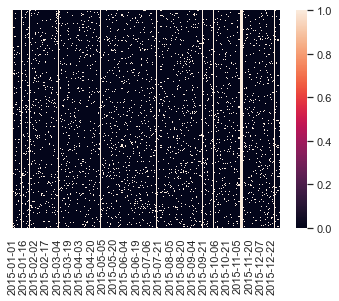

In [238]:
sns.heatmap(in_time_copy.isnull(),yticklabels=False)

### Removing NaN values from `in_time_copy` and `out_time_copy` dataset

In [239]:
for f in in_time_copy.columns:
    if in_time_copy[f].isnull().mean()*100==100:
        in_time_copy.drop(f,axis=1,inplace=True)
        out_time_copy.drop(f,axis=1,inplace=True)


<AxesSubplot:>

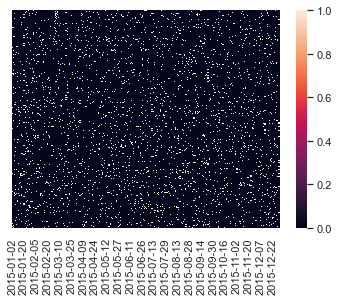

In [240]:
sns.heatmap(in_time_copy.isnull(),yticklabels=False)

In [241]:
in_time_copy.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2015-03-30 10:11:44,2015-03-31 10:08:13,2015-04-01 10:12:37,2015-04-02 09:45:27,2015-04-03 10:00:30,2015-04-06 09:40:19,2015-04-07 10:16:43,2015-04-08 10:04:34,20

In [242]:
in_time_copy=in_time_copy.fillna('1900-01-01 23:59:59')
out_time_copy=out_time_copy.fillna('1900-01-01 23:59:59')

<AxesSubplot:>

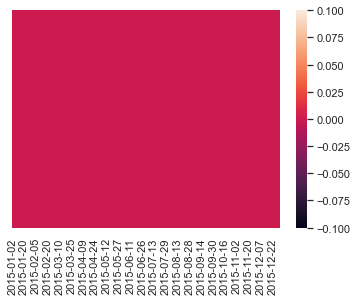

In [243]:
sns.heatmap(in_time_copy.isnull(),yticklabels=False)

<AxesSubplot:>

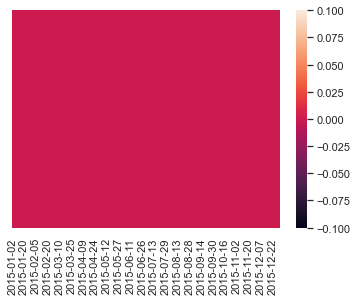

In [244]:
sns.heatmap(out_time_copy.isnull(),yticklabels=False)

In [245]:
for f in in_time_copy.columns:
    in_time_copy[f]=pd.to_datetime(in_time_copy[f])
    out_time_copy[f]=pd.to_datetime(out_time_copy[f])

In [246]:
in_time_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 249 entries, 2015-01-02 to 2015-12-31
dtypes: datetime64[ns](249)
memory usage: 8.4 MB


In [247]:
out_time_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 249 entries, 2015-01-02 to 2015-12-31
dtypes: datetime64[ns](249)
memory usage: 8.4 MB


### Converting Year time Data to hours and saving to `hours_worked.csv`

*** This step will take 15 to 20 mins ***

In [256]:
# hours_work = out_time_copy.copy()

# for col in range(in_time_copy.shape[1]):
#     for row in range(in_time_copy.shape[0]):
#         hrs=out_time_copy.iloc[row,col]-in_time_copy.iloc[row,col]
#         hrs=hrs.total_seconds()/3600
#         hours_work.iloc[row,col]=hrs 
#         print(col,", ",row)
        

In [257]:
hours_work.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,7.208333,7.189722,7.410833,7.006667,7.289722,7.484444,7.262778,7.831111,7.346944,7.2675,0.0,6.775833,7.095,7.050556,7.604722,7.629167,7.118889,7.413611,6.849722,6.901667,7.203056,7.605278,7.565278,7.47,7.601389,7.267222,7.193056,7.435278,7.205278,7.605833,7.416111,7.839722,0.0,7.832222,7.441111,7.225,7.583611,7.200833,7.385833,7.156944,6.759722,7.744444,7.815,7.408611,6.923056,7.161111,7.08,7.310278,0.0,6.915,7.197778,7.847778,7.1625,7.616389,7.251944,7.445556,0.0,7.555833,7.356944,7.865,7.336944,7.658611,7.187778,7.040833,7.64,7.427222,7.803056,7.115833,7.348056,7.146667,7.459722,7.756944,7.284722,7.695278,6.975556,7.525,7.336389,7.5625,7.241944,7.889167,7.691667,7.508056,7.410556,7.308611,7.456667,7.062778,7.615,0.0,7.444722,7.5025,7.901667,6.816944,0.0,7.333056,7.319444,7.465278,7.128889,7.573056,7.199722,7.877778,7.447778,0.0,0.0,7.717222,7.514167,7.041944,0.0,7.072778,0.0,7.075278,7.575,7.421389,7.595278,7.542222,7.526111,7.521389,7.248889,7.178333,6.912778,7.112778,7.753611,7.052222,7.661667,7.303056,7.723611,7.618333,7.158889,7.9475,7.651389,7.4925,6.936944,7.368611,7.276389,7.127778,7.624444,7.273889,7.087222,7.253889,7.878889,6.681667,7.480556,7.473333,6.705,7.148611,7.232222,7.380556,6.949444,7.178889,7.674722,7.505556,7.424722,

In [258]:
hours_work.to_csv('hours_worked.csv',index=False)

### Reading the `hours_worked.csv`

In [259]:
work_df=pd.read_csv('hours_worked.csv')

In [260]:
work_df.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,7.208333,7.189722,7.410833,7.006667,7.289722,7.484444,7.262778,7.831111,7.346944,7.267500,0.000000,6.775833,7.095000,7.050556,7.604722,7.629167,7.118889,7.413611,6.849722,6.901667,7.203056,7.605278,7.565278,7.470000,7.601389,7.267222,7.193056,7.435278,7.205278,7.605833,7.416111,7.839722,0.000000,7.832222,7.441111,7.225000,7.583611,7.200833,7.385833,7.156944,6.759722,7.744444,7.815000,7.408611,6.923056,7.161111,7.080000,7.310278,0.000000,6.915000,7.197778,7.847778,7.162500,7.616389,7.251944,7.445556,0.000000,7.555833,7.356944,7.865000,7.336944,7.658611,7.187778,7.040833,7.640000,7.427222,7.803056,7.115833,7.348056,7.146667,7.459722,7.756944,7.284722,7.695278,6.975556,7.525000,7.336389,7.562500,7.241944,7.889167,7.691667,7.508056,7.410556,7.308611,7.456667,7.062778,7.615000,0.000000,7.444722,7.502500,7.901667,6.816944,0.000000,7.333056,7.319444,7.465278,7.128889,7.573056,7.199722,7.877778,7.447778,0.000000,0.000000,7.717222,7.514167,7.041944,0.000000,7.072778,0.000000,7.075278,7.575000,7.421389,7.595278,7.542222,7.526111,7.521389,7.248889,7.178333,6.912778,7.112778,7.753611,7.052222,7.661667,7.303056,7.723611,7.618333,7.158889,7.947500,7.651389,7.492500,6.936944,7.368611,7.276389,7.127778,7.624444,7.273889,7.087222,7.253889,7.878889,6.68166

### Finding Average No. of working Hours of each Employee

In [261]:
work_df_transpose=work_df.transpose()
work_df_transpose.head()

0         1         2         3         4          5     \
2015-01-02  7.208333  8.109167  6.692500  7.338333  8.055556  10.779444   
2015-01-05  7.189722  7.454722  7.265556  7.291944  7.988056  10.721944   
2015-01-06  7.410833  0.000000  6.405278  6.943056  7.682500  10.963611   
2015-01-07  7.006667  7.396944  6.765000  6.919444  7.806111  10.298611   
2015-01-08  7.289722  7.416667  7.345000  6.850833  7.662222  11.009444   

                6         7         8         9         10        11    \
2015-01-02  6.838333  7.090278  0.000000  7.360556  7.620556  7.256944   
2015-01-05  7.538333  7.053611  6.983611  7.101389  7.938889  7.130000   
2015-01-06  7.266667  6.652500  7.318056  7.515000  7.768611  7.400000   
2015-01-07  6.421944  6.826111  7.557222  7.153056  8.681389  6.871667   
2015-01-08  7.039722  6.328611  7.386944  6.827222  8.451111  6.813889   

                12         13        14        15        16         17    \
2015-01-02  0.000000   9.251944  6.314444  6.422778  6.819167  10.995278   
2015-01-05  9.393889   9.476667  6.050278  6.538056  6.588611  11.606944   
2015-01-06  9.523611   9.146111  5.764444  7.090556  6.684444   0.000000   
2015-01-07  0.000000   9.289444  5.998333  7.156389  7.000833  10.998056   
2015-01-08  9.397500  10.467500  6.225000  6.307778  7.283056  10.771667   

                18        19        20        21        22        23    \
2015-01-02  6.947500  9.382500  7.421389  6.248889  8.911944  6.467222   
2015-01-05  7.150278  8.925556  7.208056  6.278333  8.291111  6.994444   
2015-01-06  6.732222  9.437500  7.272222  6.110556  0.000000  6.701667   
2015-01-07  7.141944  9.055556  7.794722  5.708333  8.363611  7.128056   
2015-01-08  7.029722  8.852500  8.305278  5.954722  0.000000  6.409167   

                24        25         26        27         28        29    \
2015-01-02  7.182778  8.966111  11.182778  8.024167  10.777500  0.000000   
2015-01-05  7.601667  9.079722  11.163889  7.744444  10.465000  6.846944   
2015-01-06  7.384444  9.444444  11.498889  6.941111  11.258611  7.133056   
2015-01-07  7.302500  9.398889  11.212500  7.726111  10.605278  6.950000   
2015-01-08  7.048611  9.045278  11.032778  7.675000  11.046389  6.545000   

                 30        31         32        33        34         35    \
2015-01-02   9.670556  7.241111  10.494444  6.418611  6.336111   0.000000   
2015-01-05   9.920833  6.403889  10.851667  6.087222  7.166111  10.343056   
2015-01-06  10.377778  6.177500  10.345000  6.495833  6.792500  10.467222   
2015-01-07  10.463889  7.331111  10.311111  6.314722  6.740833   0.000000   
2015-01-08  10.413889  6.881111  10.781111  6.641111  5.890556  10.811944   

                 36        37        38        39        40        41    \
2015-01-02   9.740833  6.313611  6.224444  7.255278  7.481944  7.844444   
2015-01-05   9.595278  6.445000  7.048056  8.168611  6.356111  7.528889   
2015-01-06  10.062778  5.408611  6.693611  7.664167  7.168611  7.256944   
2015-01-07   9.543611  6.042500  7.028889  7.651944  7.106667  8.127778   
2015-01-08  10.249722  6.125000  6.637222  7.281389  0.000000  7.668889   

                42        43        44        45        46        47    \
2015-01-02  7.080556  7.526944  7.454722  7.509444  7.431111  7.611944   
2015-01-05  7.248611  7.166389  7.306111  6.746667  7.537500  0.000000   
2015-01-06  6.950833  6.997500  7.333056  7.319167  8.224722  7.680000   
2015-01-07  7.333056  7.135556  7.032500  6.939444  7.407500  8.058889   
2015-01-08  7.329722  7.248611  7.413889  7.486667  7.771389  8.095833   

                48        49         50        51        52        53    \
2015-01-02  7.193056  0.000000  10.798611  9.564722  6.620556  7.741667   
2015-01-05  6.902778  6.873056  10.687778  9.063611  6.987500  7.587222   
2015-01-06  0.000000  6.380833  10.691944  9.436944  6.512778  7.320833   
2015-01-07  7.322778  7.108333  10.900556  8.853333  6.753611  6.763611   
2015-01-08  7.053333  6.666

In [262]:
work_desc=work_df_transpose.describe()

In [263]:
avg_hour_work=work_desc.loc['mean']
avg_hour_work=pd.DataFrame(avg_hour_work)
avg_hour_work.columns=['avg working hours']
avg_hour_work

,avg working hours
0,6.870229
1,7.315971
2,6.816081
3,6.789215
4,7.877561
...,...
4405,8.316921
4406,5.897197
4407,7.149526
4408,9.187612


### Combining `avg_hours_work` and `main` dataset

In [264]:
main=pd.concat([main,avg_hour_work],join="outer",axis=1)
main.shape

(4410, 30)

In [265]:
main.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,avg working hours
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3,6.870229
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4,7.315971
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3,6.816081
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3,6.789215
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3,7.877561


### Sperating the data into  numerical varibles excluding discrete features

In [266]:
numerical_features=main.select_dtypes(exclude="object").copy()
numerical_features.head()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,avg working hours
0,51,6,2,1,1,1,131160,1.0,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3,6.870229
1,31,10,1,1,2,1,41890,0.0,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4,7.315971
2,32,17,4,1,3,4,193280,1.0,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3,6.816081
3,38,2,5,1,4,3,83210,3.0,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3,6.789215
4,32,10,1,1,5,1,23420,4.0,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3,7.877561


### Finding unsignificant features and discrete numeric feature/Ordinal data in numeric data

In [267]:
numerical_features.shape

(4410, 22)

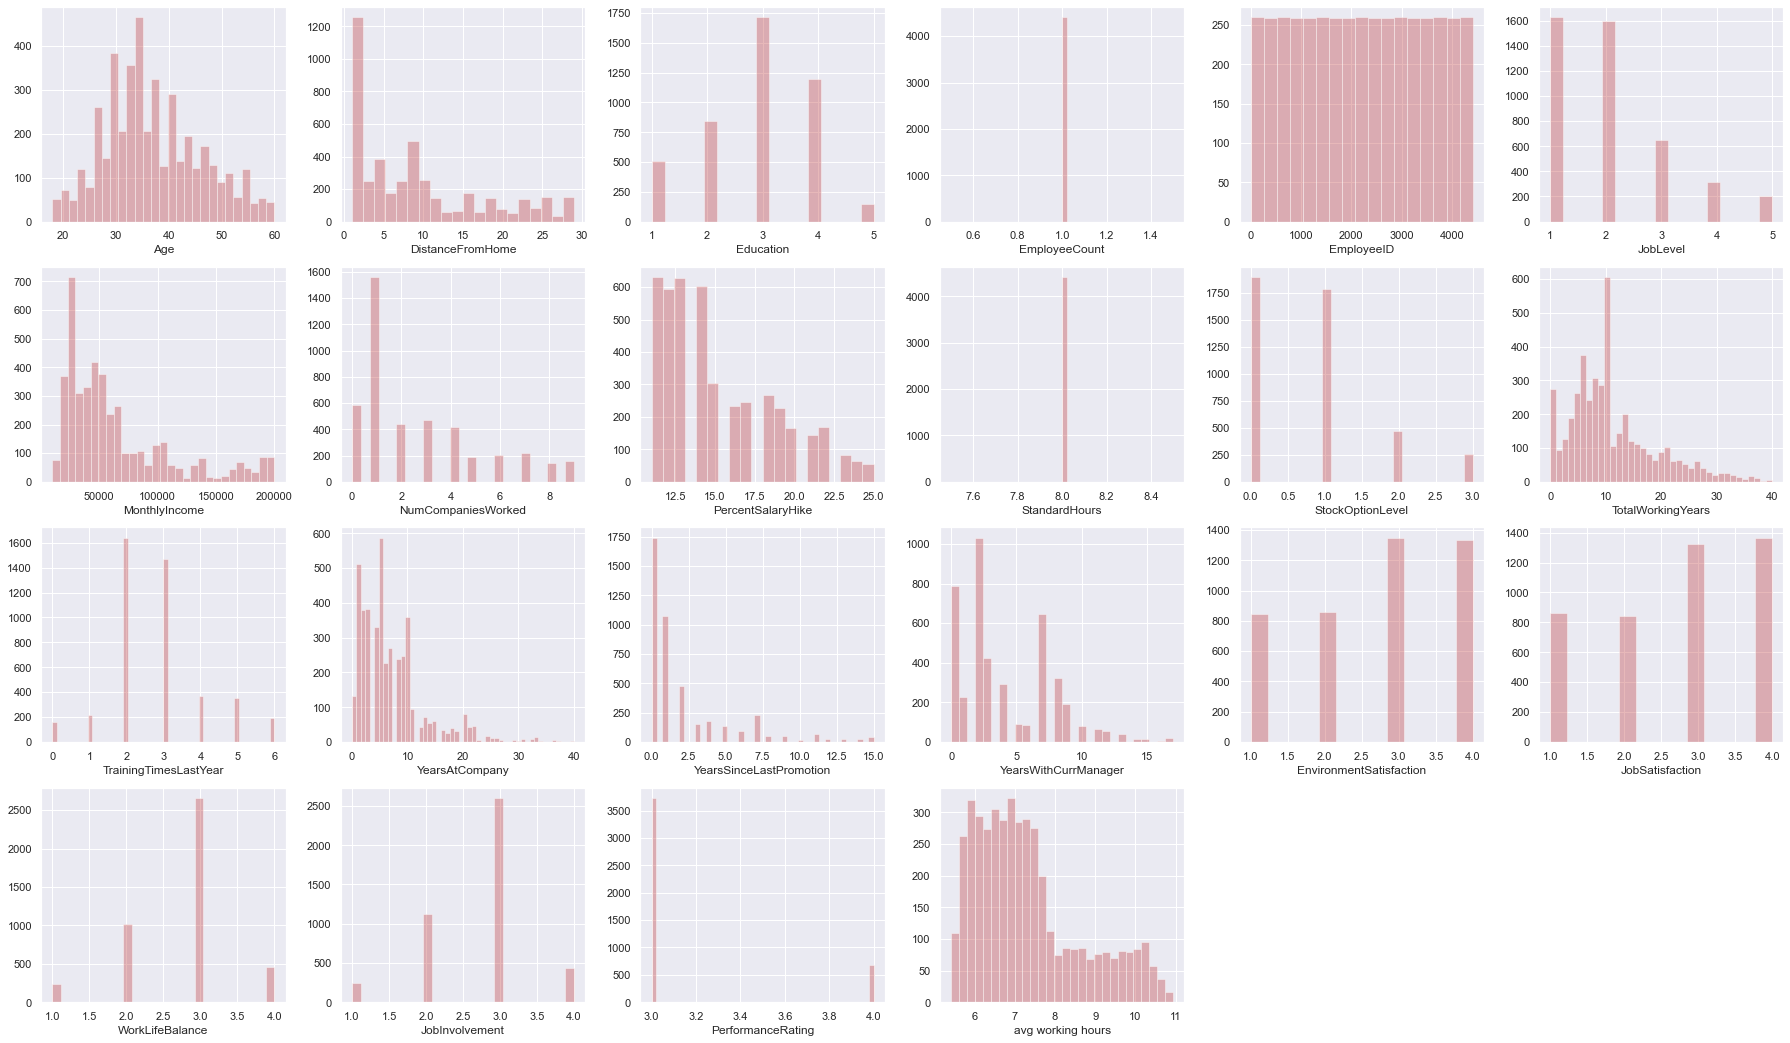

In [268]:
sns.set()
fig = plt.figure(figsize=(25,25))
   
for index,col in enumerate(numerical_features):
    plt.subplot(7,6,index+1)
    sns.distplot(numerical_features[col].dropna(),kde=False,color='r')
    
fig.tight_layout(pad=1.0)        

In [269]:
numerical_unsignificant_features=['EmployeeCount','EmployeeID','StandardHours']
discrete_numerical_features=['Education','JobInvolvement','EnvironmentSatisfaction',
                             'JobSatisfaction','PerformanceRating','WorkLifeBalance']

In [270]:
main.drop(numerical_unsignificant_features,axis=1,inplace=True)
numerical_features.drop(numerical_unsignificant_features+discrete_numerical_features,axis=1,inplace=True)
numerical_features.head()

,Age,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,avg working hours
0,51,6,1,131160,1.0,11,0,1.0,6,1,0,0,6.870229
1,31,10,1,41890,0.0,23,1,6.0,3,5,1,4,7.315971
2,32,17,4,193280,1.0,15,3,5.0,2,5,0,3,6.816081
3,38,2,3,83210,3.0,11,3,13.0,5,8,7,5,6.789215
4,32,10,1,23420,4.0,12,2,9.0,2,6,0,4,7.877561


In [271]:
numerical_features.shape

(4410, 13)

### Detecting Outliers in nuerical data excluding ordinal features

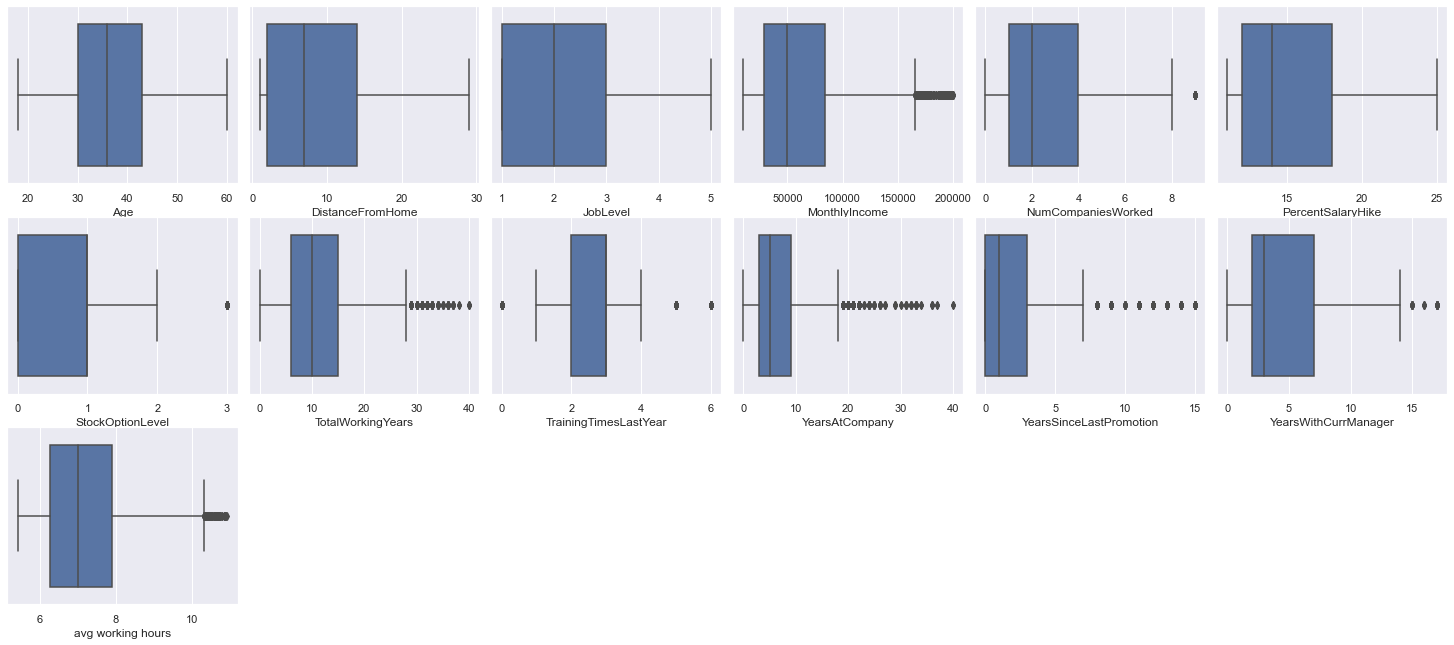

In [272]:
fig=plt.figure(figsize=(20,20))

for index,f in enumerate(numerical_features):
    plt.subplot(7,6,index+1)
    sns.boxplot(main[f].dropna())
        
plt.tight_layout(pad=0)        

# Getting all categorical features include ordinal

In [273]:
categorical_features=main.select_dtypes(include="object").copy()

for f in discrete_numerical_features:
    categorical_features[f]=main[f].copy()

categorical_features.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,Education,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,PerformanceRating,WorkLifeBalance
0,No,Travel_Rarely,Sales,Life Sciences,Female,Healthcare Representative,Married,Y,2,3,3.0,4.0,3,2.0
1,Yes,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Single,Y,1,2,3.0,2.0,4,4.0
2,No,Travel_Frequently,Research & Development,Other,Male,Sales Executive,Married,Y,4,3,2.0,2.0,3,1.0
3,No,Non-Travel,Research & Development,Life Sciences,Male,Human Resources,Married,Y,5,2,4.0,4.0,3,3.0
4,No,Travel_Rarely,Research & Development,Medical,Male,Sales Executive,Single,Y,1,3,4.0,1.0,3,3.0


# Converting ordinal(numerical dtype) into object dtype

In [274]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                4410 non-null   object 
 1   BusinessTravel           4410 non-null   object 
 2   Department               4410 non-null   object 
 3   EducationField           4410 non-null   object 
 4   Gender                   4410 non-null   object 
 5   JobRole                  4410 non-null   object 
 6   MaritalStatus            4410 non-null   object 
 7   Over18                   4410 non-null   object 
 8   Education                4410 non-null   int64  
 9   JobInvolvement           4410 non-null   int64  
 10  EnvironmentSatisfaction  4385 non-null   float64
 11  JobSatisfaction          4390 non-null   float64
 12  PerformanceRating        4410 non-null   int64  
 13  WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(3),

In [275]:
for f in discrete_numerical_features:
    categorical_features[f]=categorical_features[f].astype("object")
    main[f]=main[f].astype("object")

In [276]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Attrition                4410 non-null   object
 1   BusinessTravel           4410 non-null   object
 2   Department               4410 non-null   object
 3   EducationField           4410 non-null   object
 4   Gender                   4410 non-null   object
 5   JobRole                  4410 non-null   object
 6   MaritalStatus            4410 non-null   object
 7   Over18                   4410 non-null   object
 8   Education                4410 non-null   object
 9   JobInvolvement           4410 non-null   object
 10  EnvironmentSatisfaction  4385 non-null   object
 11  JobSatisfaction          4390 non-null   object
 12  PerformanceRating        4410 non-null   object
 13  WorkLifeBalance          4372 non-null   object
dtypes: object(14)
memory usage: 482.5+ KB


### Finding Unsignificant features in categorical data

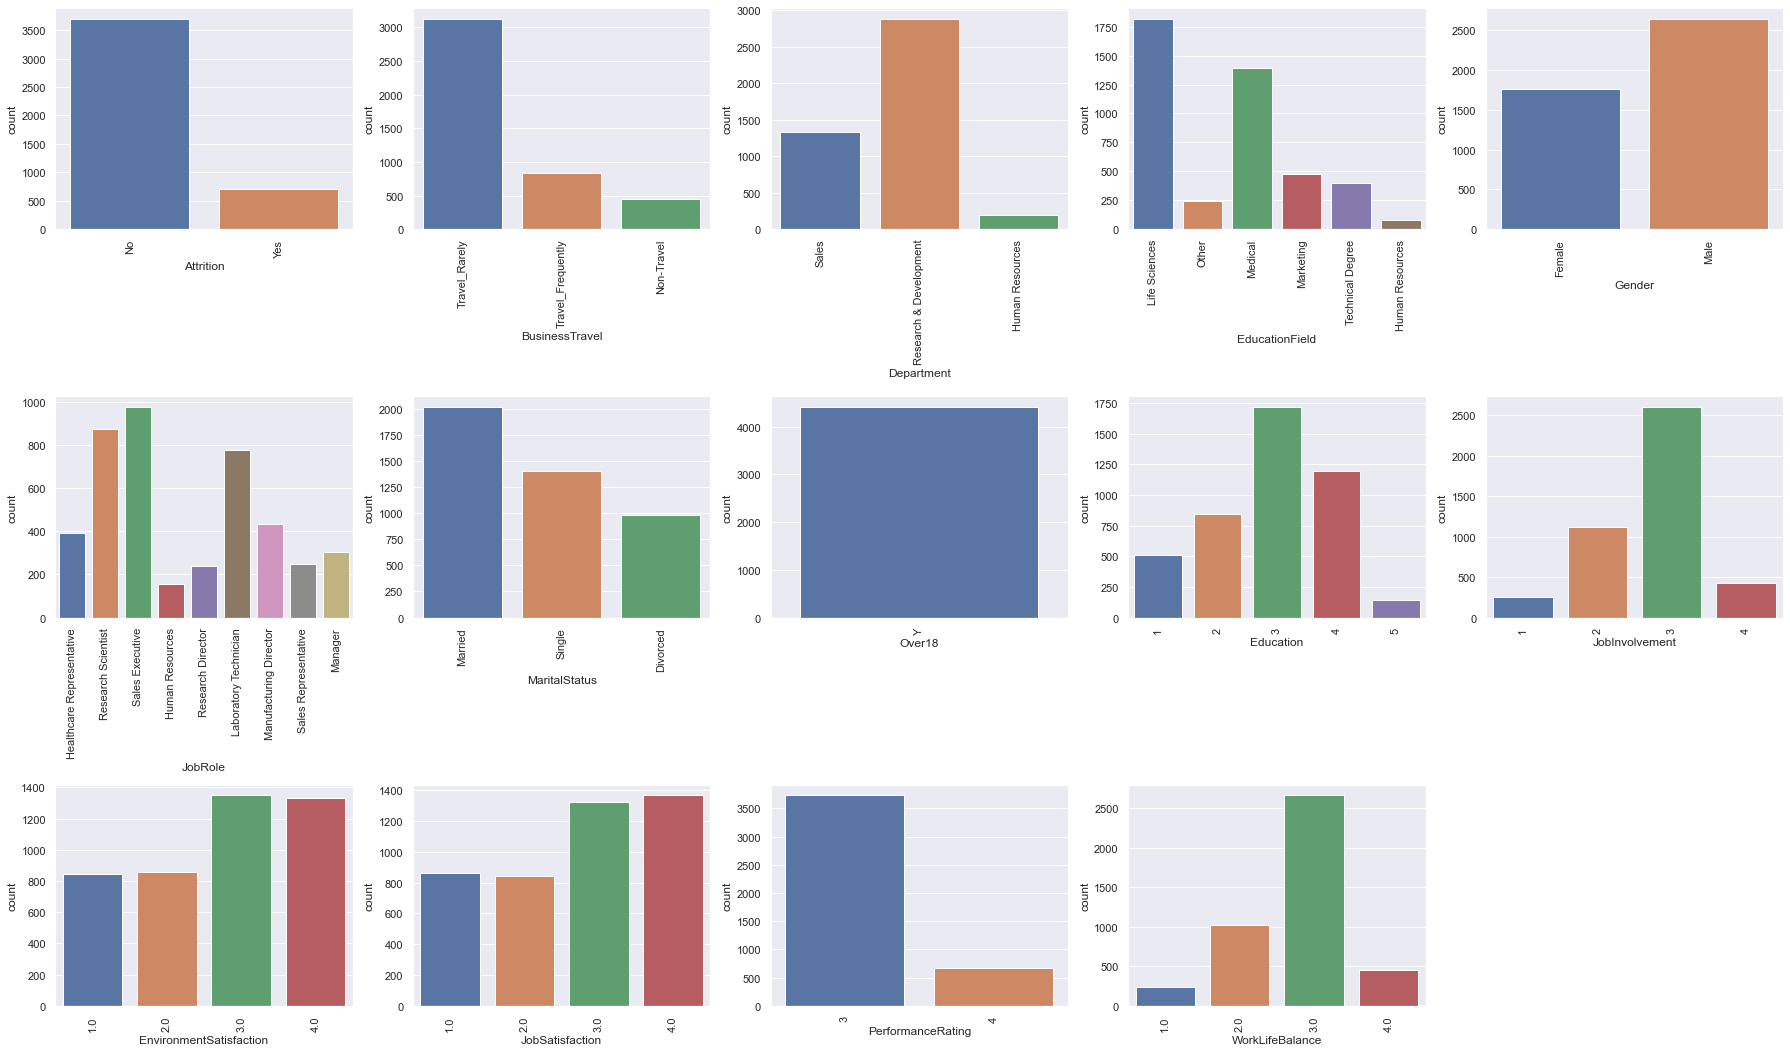

In [277]:
import warnings
warnings.filterwarnings('ignore')
sns.set()
fig = plt.figure(figsize=(25,25))
   
for index,col in enumerate(categorical_features):
    plt.subplot(5,5,index+1)
    sns.countplot(categorical_features[col].dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)        

In [278]:
categorical_unsignificant_features=['Over18']

In [279]:
main.drop(categorical_unsignificant_features,axis=1,inplace=True)
categorical_features.drop(categorical_unsignificant_features,axis=1,inplace=True)

In [280]:
categorical_features.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Education,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,PerformanceRating,WorkLifeBalance
0,No,Travel_Rarely,Sales,Life Sciences,Female,Healthcare Representative,Married,2,3,3.0,4.0,3,2.0
1,Yes,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Single,1,2,3.0,2.0,4,4.0
2,No,Travel_Frequently,Research & Development,Other,Male,Sales Executive,Married,4,3,2.0,2.0,3,1.0
3,No,Non-Travel,Research & Development,Life Sciences,Male,Human Resources,Married,5,2,4.0,4.0,3,3.0
4,No,Travel_Rarely,Research & Development,Medical,Male,Sales Executive,Single,1,3,4.0,1.0,3,3.0


### Checking for NaN values in `Numerical_features` dataset

In [281]:
main.shape

(4410, 26)

In [282]:
print(numerical_features.isnull().sum())
print(numerical_features.shape)

Age                         0
DistanceFromHome            0
JobLevel                    0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
avg working hours           0
dtype: int64
(4410, 13)


# NaN values in categorical_features

In [283]:
categorical_features.isnull().sum()

Attrition                   0
BusinessTravel              0
Department                  0
EducationField              0
Gender                      0
JobRole                     0
MaritalStatus               0
Education                   0
JobInvolvement              0
EnvironmentSatisfaction    25
JobSatisfaction            20
PerformanceRating           0
WorkLifeBalance            38
dtype: int64

## Since there are few NaN values in `numerical` as well as `categorical` features so, we are gonna drop all rows with NaN value in `main` dataset only

In [284]:
main.dropna(inplace=True)

In [285]:
main.shape

(4300, 26)

In [286]:
main.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
avg working hours          0
dtype: int64

# checking for multi-colinearity

<AxesSubplot:>

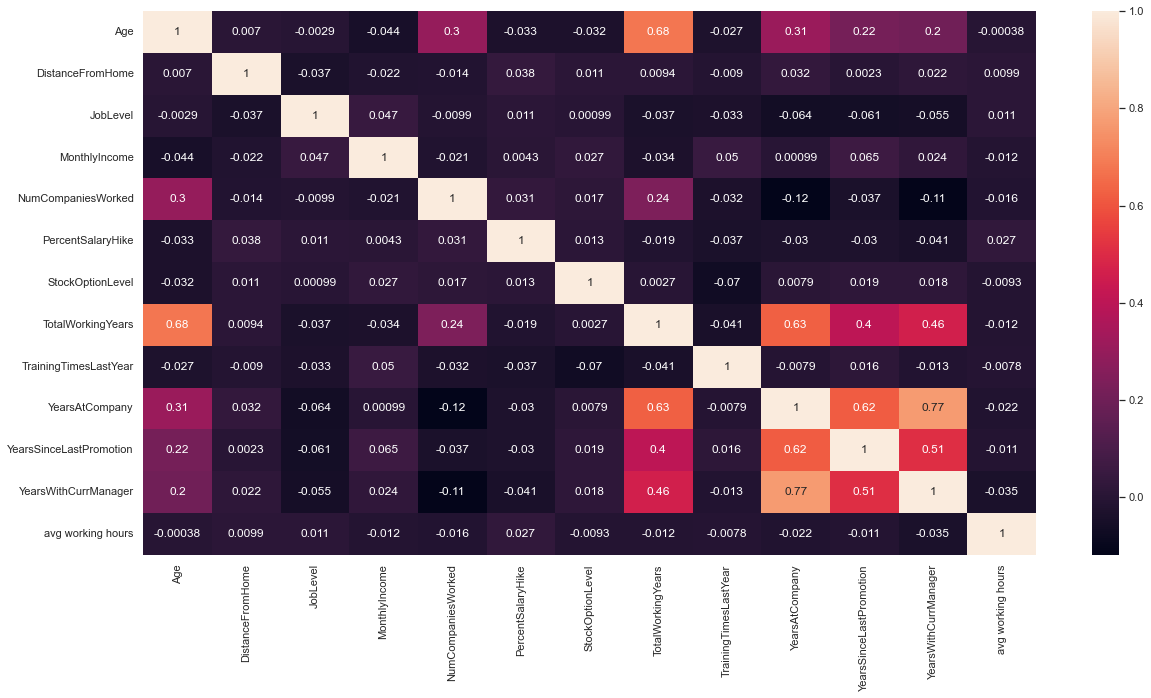

In [288]:
plt.figure(figsize=(20,10))
sns.heatmap(numerical_features.corr(),annot=True)

In [289]:
numerical_features.drop(['TotalWorkingYears','YearsAtCompany','YearsSinceLastPromotion'],axis=1,inplace=True)
main.drop(['TotalWorkingYears','YearsAtCompany','YearsSinceLastPromotion'],axis=1,inplace=True)

<AxesSubplot:>

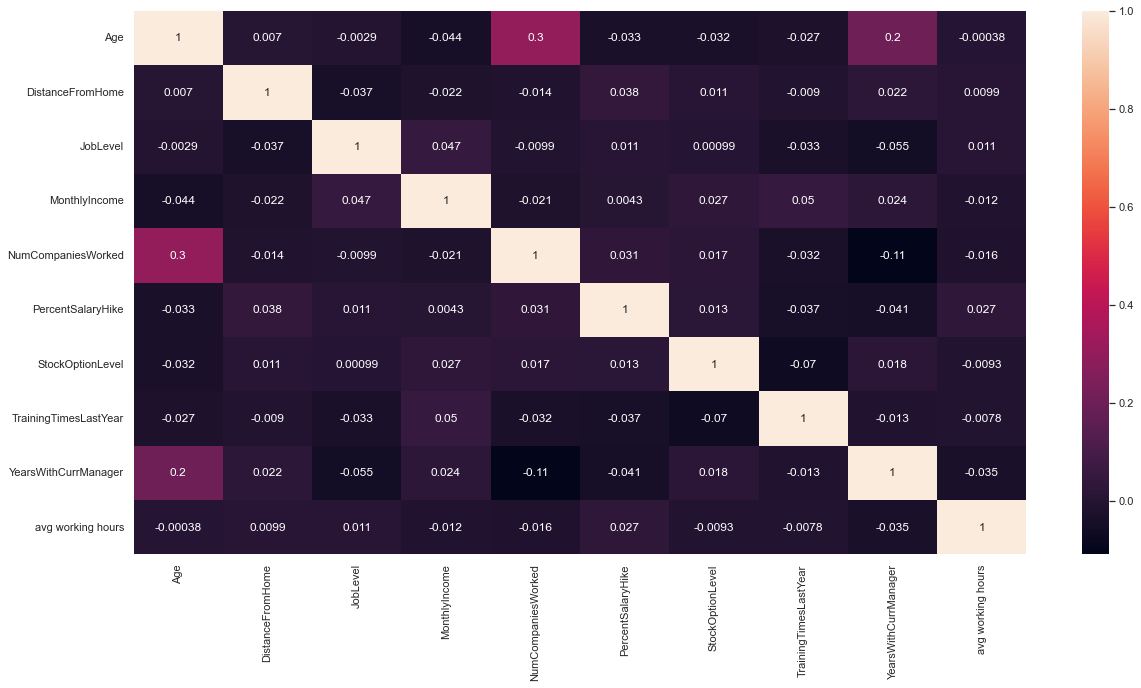

In [291]:
plt.figure(figsize=(20,10))
sns.heatmap(numerical_features.corr(),annot=True)

# Getting dummy variable in `main` dataset

In [292]:
main=pd.get_dummies(main,columns=categorical_features.columns,drop_first=True)
categorical_features=pd.get_dummies(categorical_features,columns=categorical_features.columns,drop_first=True)
main.head()

,Age,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsWithCurrManager,avg working hours,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Education_2,Education_3,Education_4,Education_5,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,EnvironmentSatisfaction_2.0,EnvironmentSatisfaction_3.0,EnvironmentSatisfaction_4.0,JobSatisfaction_2.0,JobSatisfaction_3.0,JobSatisfaction_4.0,PerformanceRating_4,WorkLifeBalance_2.0,WorkLifeBalance_3.0,WorkLifeBalance_4.0
0,51,6,1,131160,1.0,11,0,6,0,6.870229,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,31,10,1,41890,0.0,23,1,3,4,7.315971,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1
2,32,17,4,193280,1.0,15,3,2,3,6.816081,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0
3,38,2,3,83210,3.0,11,3,5,5,6.789215,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0
4,32,10,1,23420,4.0,12,2,2,4,7.877561,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


### Spliting into train_test data

In [293]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(main.drop("Attrition_Yes",axis=1),main["Attrition_Yes"],random_state=43,test_size=0.25)

In [294]:
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(3225, 47)
(3225,)
(1075, 47)
(1075,)


### Standardizing features 

In [295]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Xtrain[numerical_features.columns]=scaler.fit_transform(Xtrain[numerical_features.columns])
Xtest[numerical_features.columns]=scaler.transform(Xtest[numerical_features.columns])

In [296]:
Xtrain.head()

,Age,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsWithCurrManager,avg working hours,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Education_2,Education_3,Education_4,Education_5,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,EnvironmentSatisfaction_2.0,EnvironmentSatisfaction_3.0,EnvironmentSatisfaction_4.0,JobSatisfaction_2.0,JobSatisfaction_3.0,JobSatisfaction_4.0,PerformanceRating_4,WorkLifeBalance_2.0,WorkLifeBalance_3.0,WorkLifeBalance_4.0
3471,0.773144,1.088686,-0.075482,-0.927007,2.533547,-0.050073,-0.929122,0.168636,0.523993,-0.975998,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0
643,1.211561,-1.014977,-0.075482,1.444110,0.930508,-0.597477,0.243644,-0.609406,-1.173808,-1.061470,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0
634,-1.966965,-0.891232,0.826114,0.716226,-0.672531,0.771033,-0.929122,-0.609406,-1.173808,0.459330,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1575,-0.432504,2.326135,2.629306,-0.192937,-0.672531,1.592139,0.243644,0.168636,-1.173808,2.139188,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
1493,0.553935,-0.643742,-0.977079,0.524711,-0.672531,-0.323775,-0.929122,0.946679,0.523993,-0.795186,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [297]:
Xtest.head()

,Age,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsWithCurrManager,avg working hours,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Education_2,Education_3,Education_4,Education_5,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,EnvironmentSatisfaction_2.0,EnvironmentSatisfaction_3.0,EnvironmentSatisfaction_4.0,JobSatisfaction_2.0,JobSatisfaction_3.0,JobSatisfaction_4.0,PerformanceRating_4,WorkLifeBalance_2.0,WorkLifeBalance_3.0,WorkLifeBalance_4.0
16,-1.747756,-0.767487,-0.977079,-0.480423,-0.672531,-0.871179,2.589177,0.168636,-1.173808,-0.971841,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
2816,-1.199734,0.964941,-0.075482,-0.338813,-0.672531,-0.597477,0.243644,1.724721,0.806960,0.051250,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0
3229,0.553935,0.098727,-0.977079,-0.310448,1.331268,1.592139,2.589177,0.168636,-0.607874,1.501256,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0
3968,0.334727,-0.891232,-0.977079,-0.837434,0.529748,-0.871179,0.243644,0.168636,-0.607874,-0.958591,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
3856,-1.309339,-0.519997,1.727710,1.601076,-0.672531,-0.323775,-0.929122,0.168636,0.806960,-1.239759,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0


In [298]:
Ytrain.head()

3471    1
643     0
634     1
1575    1
1493    0
Name: Attrition_Yes, dtype: uint8

In [299]:
Ytest.head()

16      0
2816    0
3229    1
3968    0
3856    0
Name: Attrition_Yes, dtype: uint8

# Training the model

In [300]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(Xtrain,Ytrain)


LogisticRegression()

In [582]:
from sklearn.model_selection import RandomizedSearchCV

parameters={   
    'C': [0.1, 0.5, 1,10,15,20,30], 
    'penalty': ['l1', 'l2'],
    "class_weight":{0: 0.16217054263565892, 1: 0.8378294573643411}      
}

rand_cv=RandomizedSearchCV(estimator=classifier,param_distributions=parameters,return_train_score=True,cv=50)

In [583]:
rand_cv.fit(Xtrain,Ytrain)

RandomizedSearchCV(cv=50, estimator=LogisticRegression(),
                   param_distributions={'C': [0.1, 0.5, 1, 10, 15, 20, 30],
                                        'class_weight': {0: 0.16217054263565892,
                                                         1: 0.9378294573643411},
                                        'penalty': ['l1', 'l2']},
                   return_train_score=True)

In [584]:
rand_cv.best_params_

{'penalty': 'l2', 'class_weight': 0.16217054263565892, 'C': 0.1}

In [585]:
rand_cv.best_estimator_

LogisticRegression(C=0.1, class_weight=0.16217054263565892)

In [604]:
log_classifier=LogisticRegression(penalty= 'l2',C=0.1,class_weight={0: 0.16217054263565892, 1: 0.8378294573643411})
log_classifier.fit(Xtrain,Ytrain)
predictions=log_classifier.predict(Xtest)
pred_df=pd.DataFrame(predictions,columns=['predictions'])

In [605]:
pred_df.shape
# pred_df.head()

(1075, 1)

In [606]:
pred_df=pd.concat([Ytest.reset_index(drop=True),pred_df],axis=1,join="inner")

In [607]:
pred_df

,Attrition_Yes,predictions
0,0,1
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
1070,0,0
1071,0,0
1072,0,1
1073,0,1


In [608]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest, pred_df["predictions"])
print("Confusion metrics : \n",cm)

Confusion metrics : 
 [[673 230]
 [ 46 126]]


In [609]:
from sklearn.metrics import classification_report,accuracy_score
cr=classification_report(Ytest, pred_df["predictions"])
print("accuracy score : ",accuracy_score(Ytest, pred_df["predictions"]),"\n")
print(cr)

accuracy score :  0.7432558139534884 

              precision    recall  f1-score   support

           0       0.94      0.75      0.83       903
           1       0.35      0.73      0.48       172

    accuracy                           0.74      1075
   macro avg       0.64      0.74      0.65      1075
weighted avg       0.84      0.74      0.77      1075



In [610]:
fpr, tpr, threshold = roc_curve(Ytest, pred_df["predictions"])
print("False Positive rate : ",fpr)
print("True positive rate : ",tpr)
print("Threshold : ",threshold)

False Positive rate :  [0.         0.25470653 1.        ]
True positive rate :  [0.         0.73255814 1.        ]
Threshold :  [2 1 0]


In [611]:
roc_auc = auc(fpr, tpr)
print("Area under the curve is ",roc_auc)

Area under the curve is  0.7389258028792911


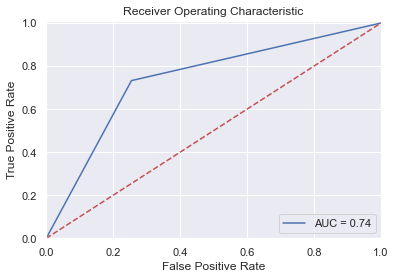

In [612]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()